In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [131]:
Ns = 1000
noise = np.random.randn(Ns,1)

In [132]:
noise.shape

(1000, 1)

In [166]:
noise[100] = 8
noise[200] = 9
noise[300] = 7
noise[500] = 9
noise[700] = 11

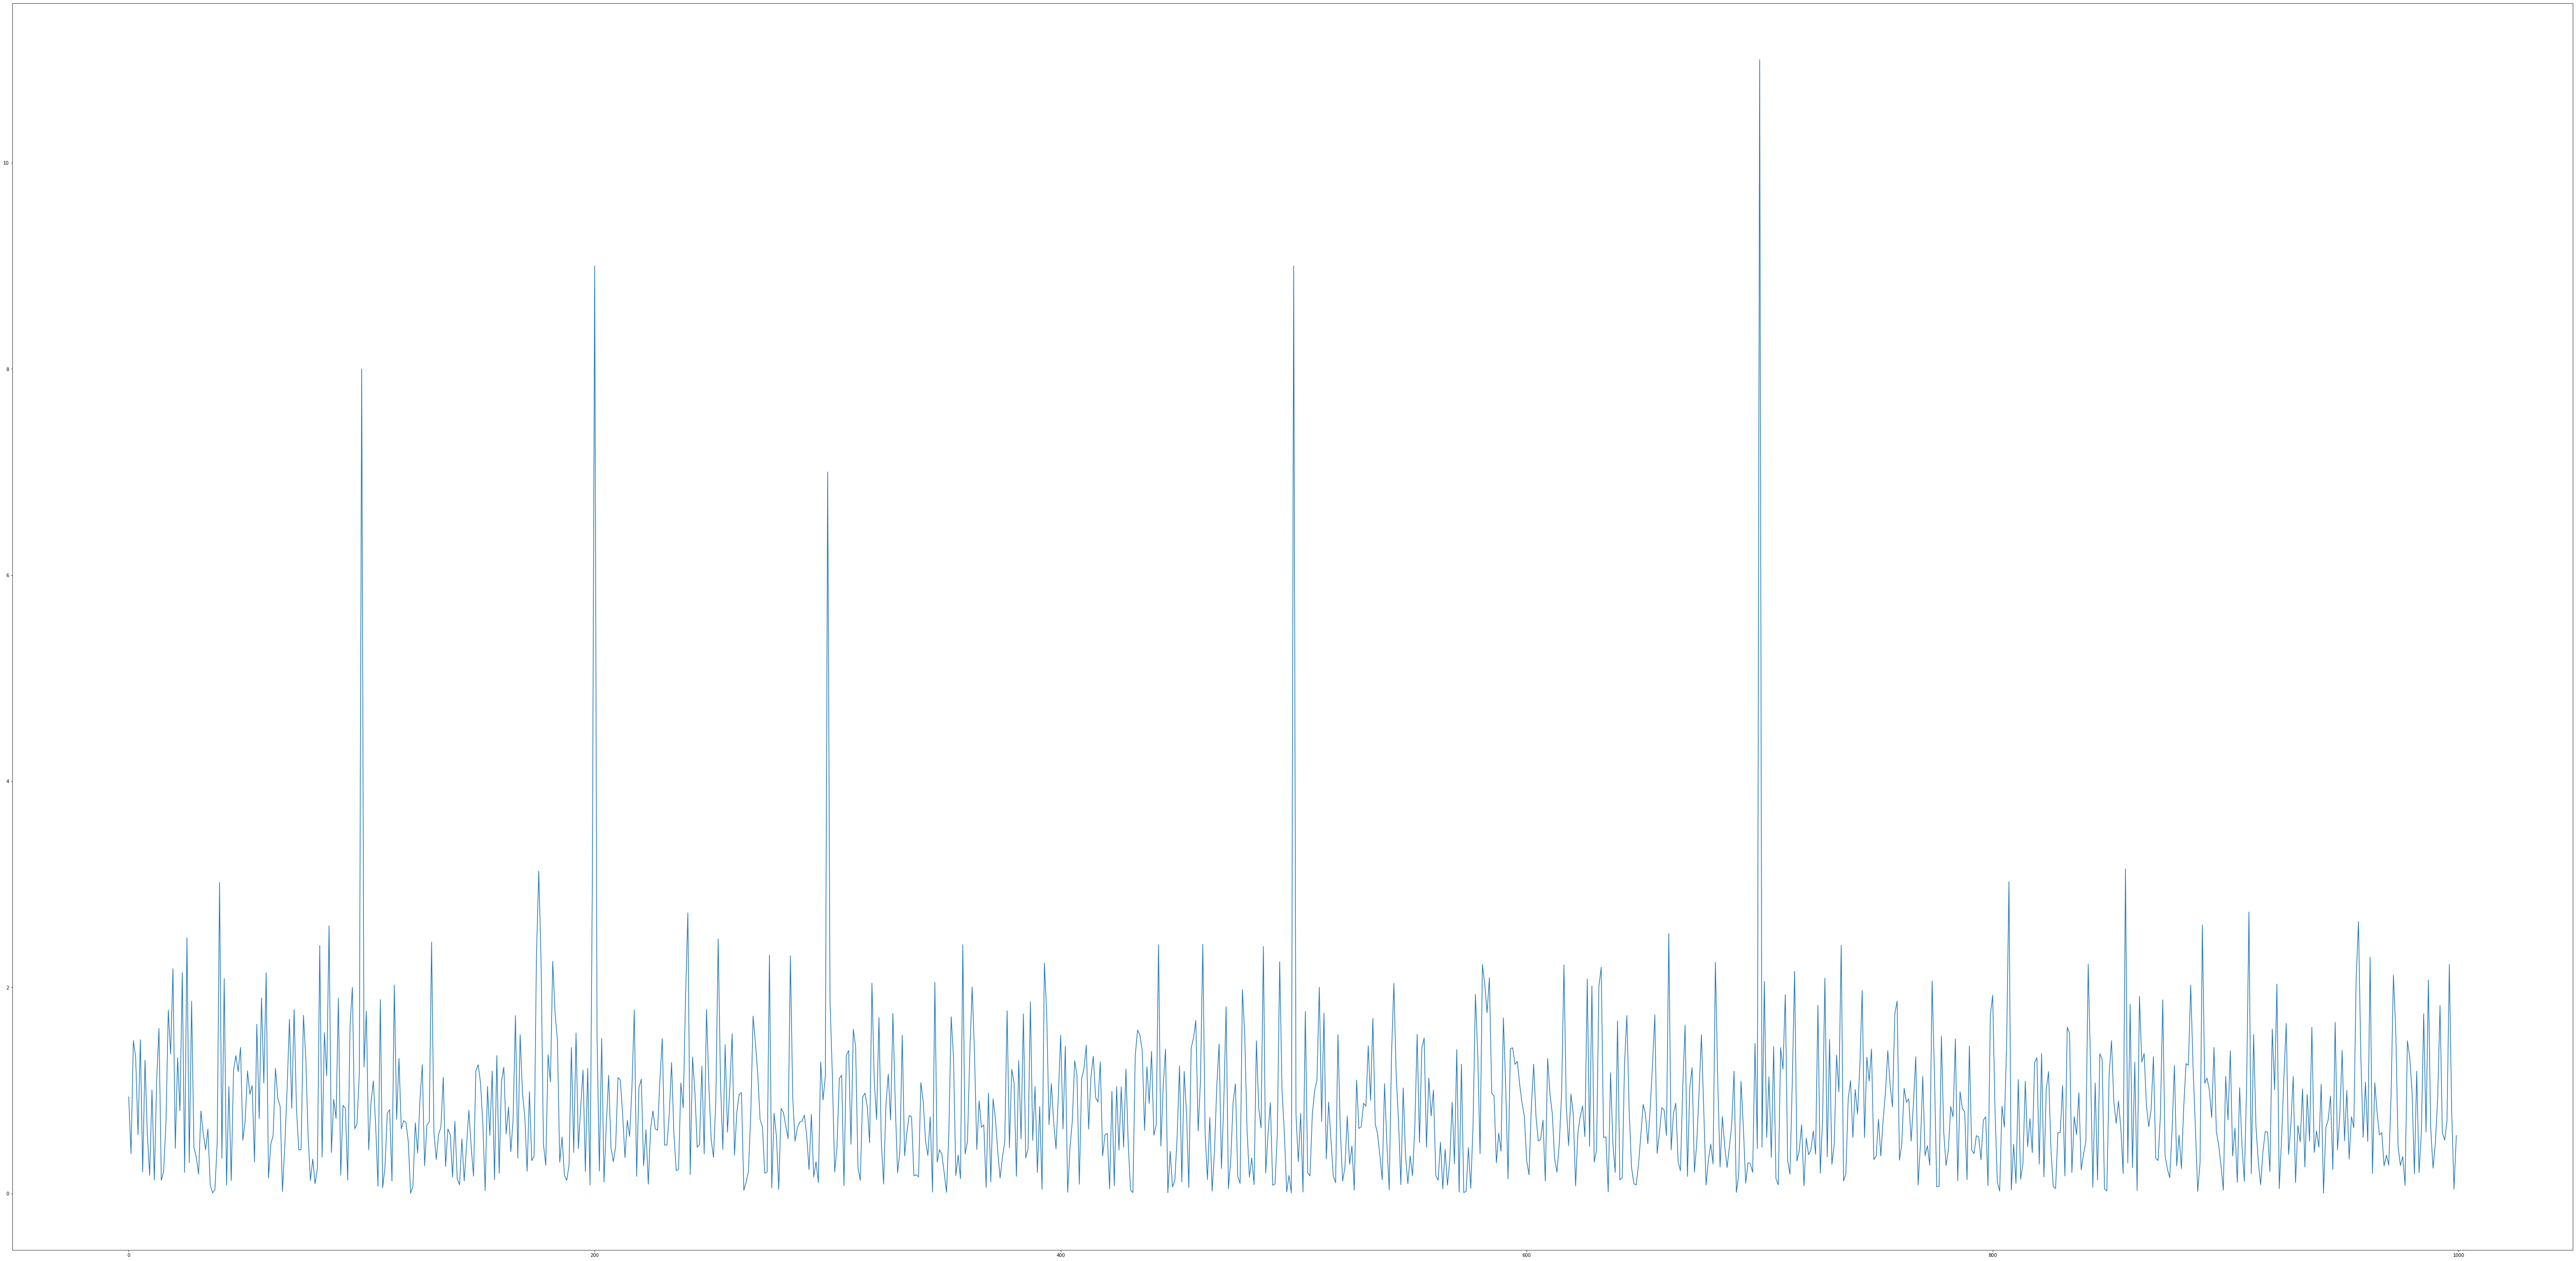

In [167]:
plt.figure(figsize=(100,50))
plt.plot(np.abs(noise))

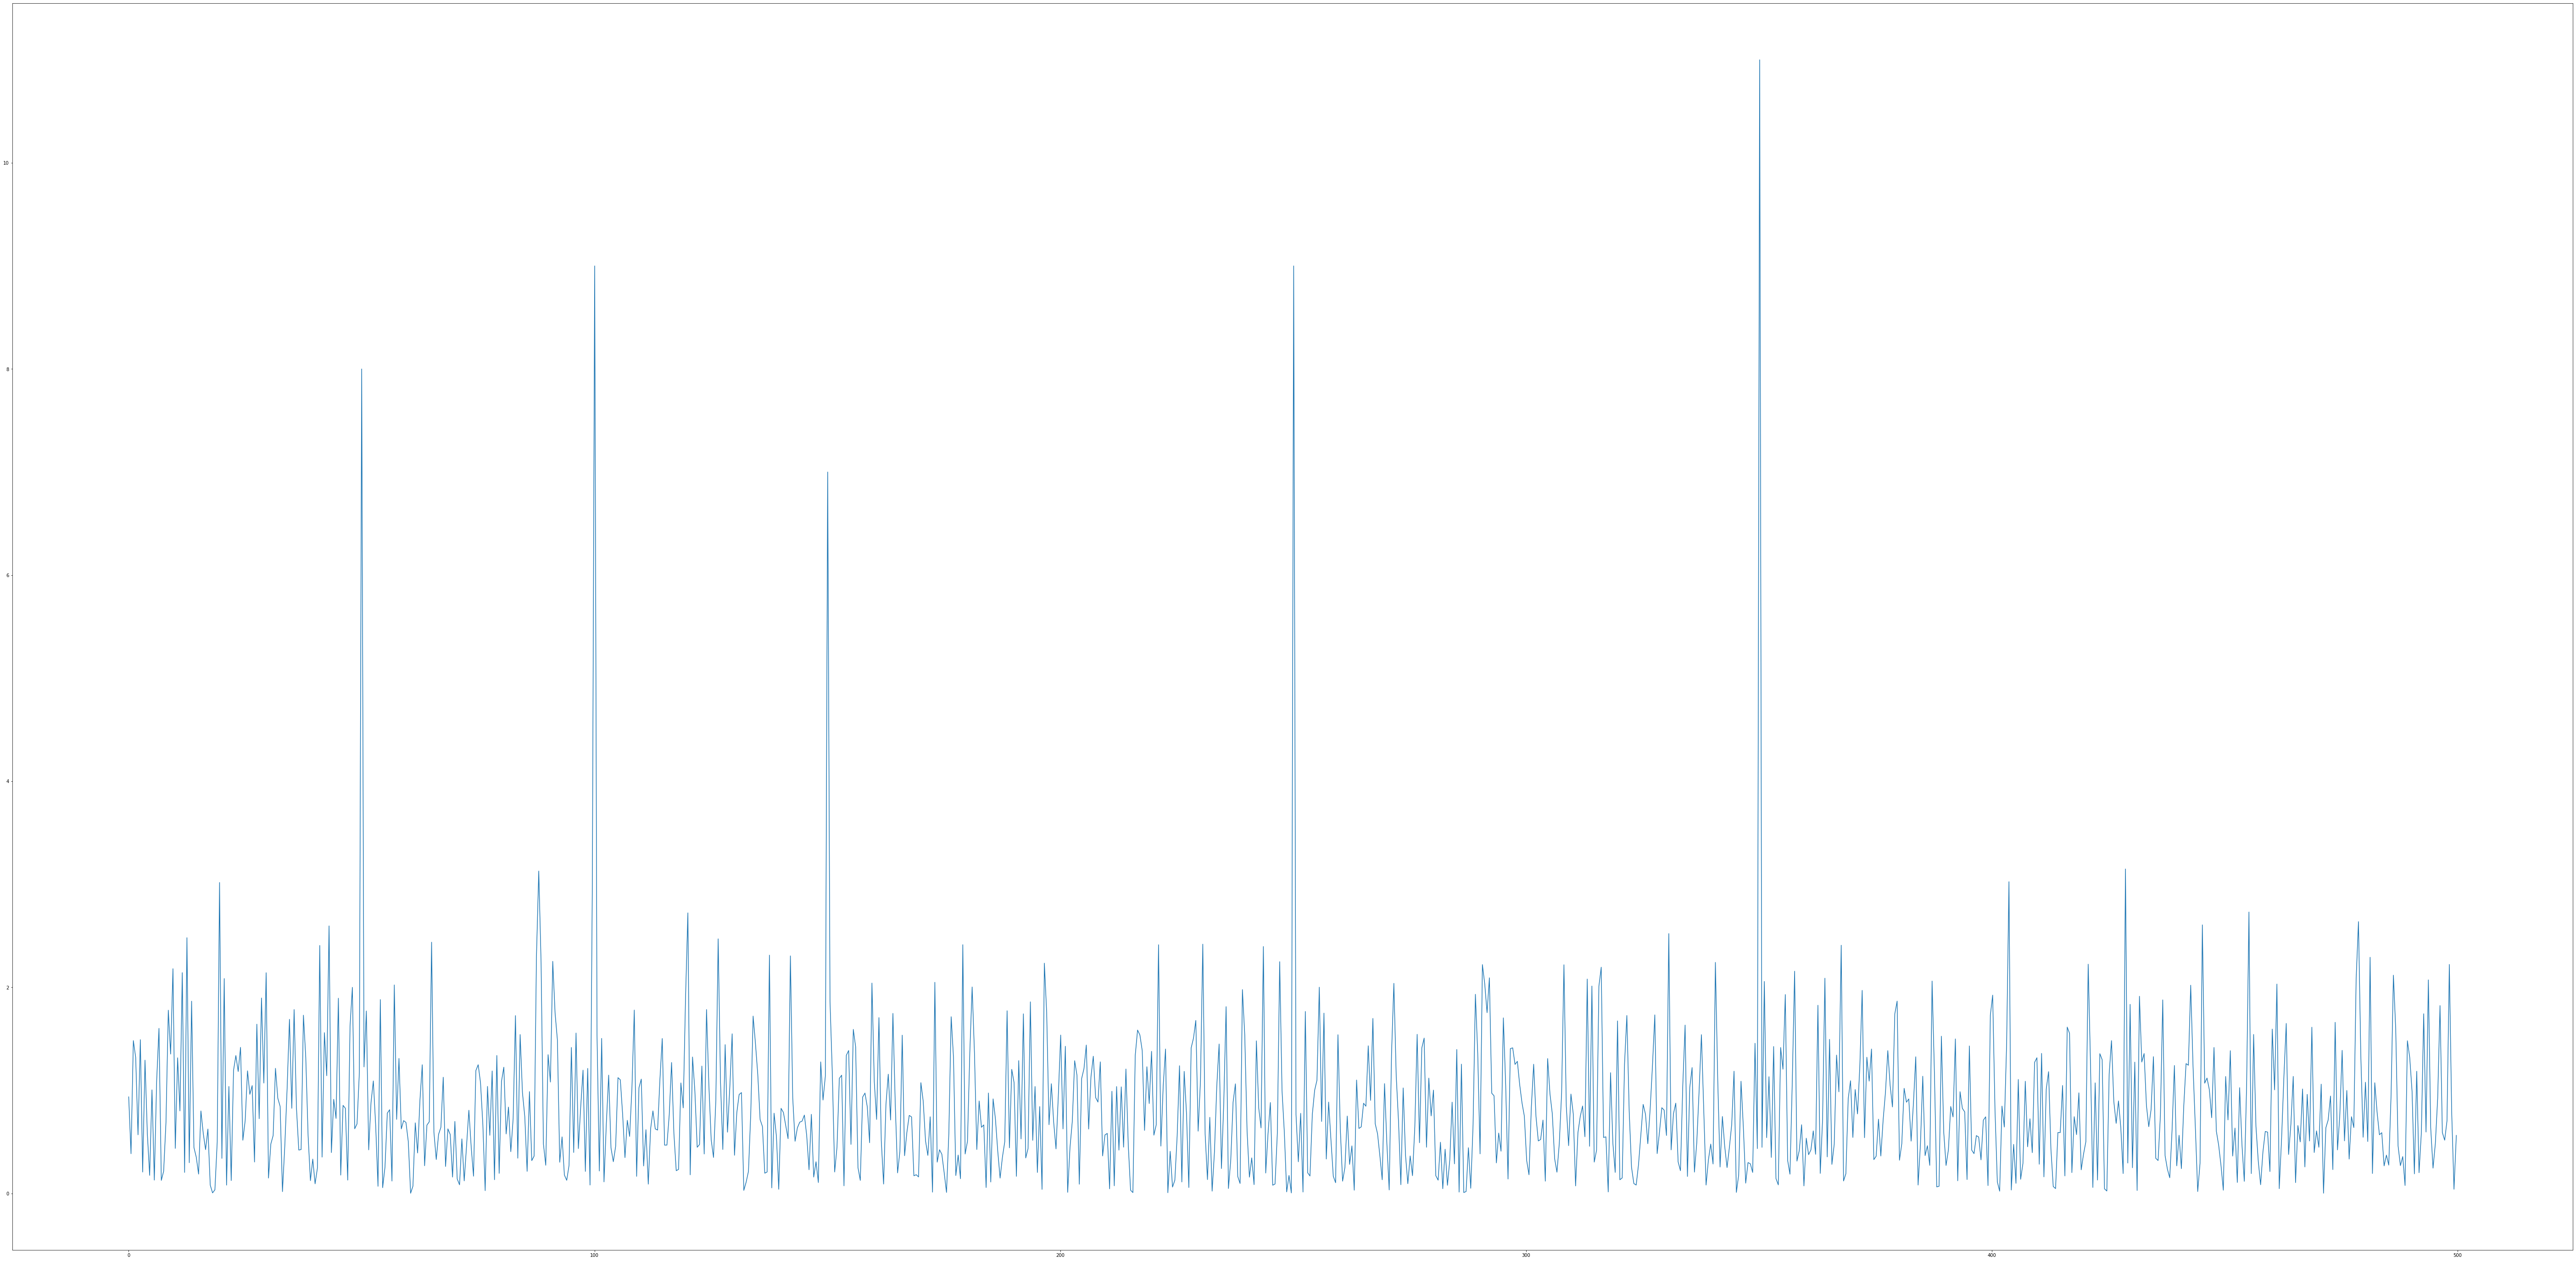

In [168]:
yf = rfft(noise)
xf = rfftfreq(Ns*2 - 1,1/Ns)
plt.figure(figsize=(100,50))
plt.plot(xf,np.abs(yf))
plt.show() 

In [169]:
from scipy.fft import fft2, rfft2

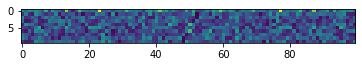

In [170]:
y = noise.reshape(10,100)
y = fft2(y)
plt.imshow(np.abs(y))

In [171]:
#2D-CFAR on noise 
Tr = 2
Td = 2

Gr = 1
Gd = 1

offset = 2

Nr = 10
Nd = 100

In [172]:
y = y/np.max(y)

In [173]:
y.shape

(10, 100)

In [174]:
for i in range((Tr+Gr-1),(Nr//2 - (Tr+Gr))):
    for j in range((Td + Gd -1),(Nd - (Td + Gd))):
        noise_level = 0
        for p in range((i -(Tr+Gr)),(i + (Tr+Gr))):
            for q in range((j - (Td+Gd)),(j + (Td+Gd))):
                if((abs(i-p)> Gr)or(abs(j-q)>Gd)) and p<51 and q<51:
                    noise_level = noise_level  + (np.exp(y[p][q]))
        print(noise_level)
        threshold = np.log(noise_level/(2*(Td+Gd+1)*2*(Tr+Gr+1)-(Gr*Gd)-1))
        threshold = threshold + offset
        CUT = y[i][j]
        if (CUT< threshold):
            y[i][j] = 0
        else:
            y[i][j] = 1


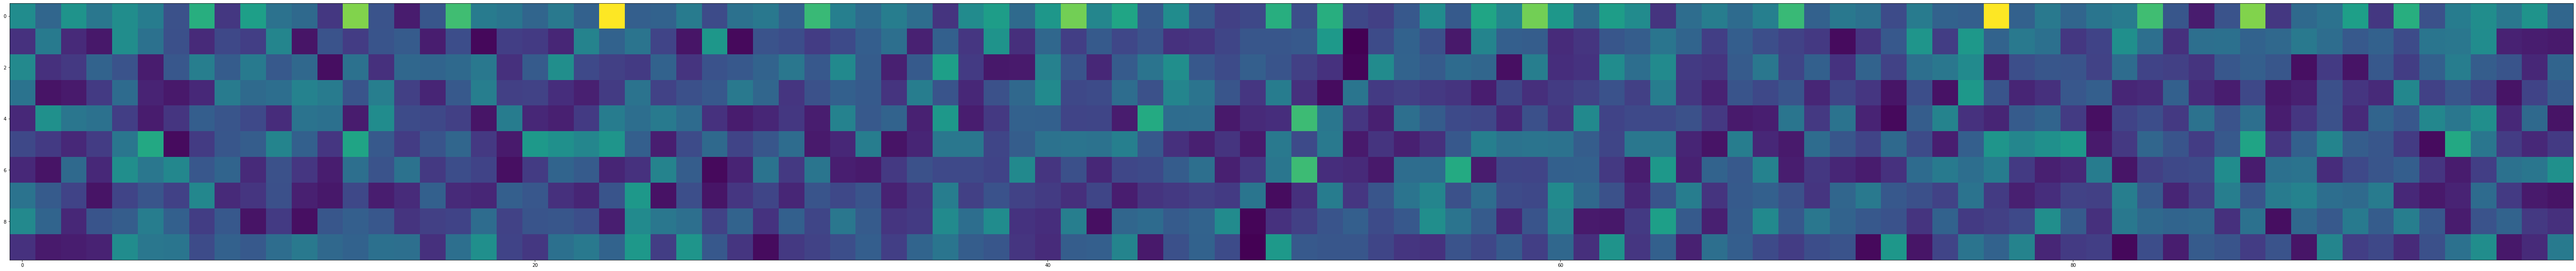

In [175]:
plt.figure(figsize=(100,50))
plt.imshow(np.abs(y))

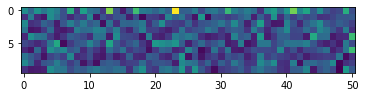

In [176]:
y = rfft2(noise.reshape(10,100))
plt.imshow(np.abs(y))

In [177]:
Tr = 2
Td = 2

Gr = 1
Gd = 1

offset = 2

Nr = 10
Nd = 50

In [178]:
y = y/np.max(y)

In [179]:
y.shape

(10, 51)

In [180]:
for i in range((Tr+Gr-1),(Nr//2 - (Tr+Gr))):
    for j in range((Td + Gd -1),(Nd - (Td + Gd))):
        noise_level = 0
        for p in range((i -(Tr+Gr)),(i + (Tr+Gr))):
            for q in range((j - (Td+Gd)),(j + (Td+Gd))):
                if((abs(i-p)> Gr)or(abs(j-q)>Gd)) and p<51 and q<51:
                    noise_level = noise_level  + (np.exp(y[p][q]))
        print(noise_level)
        threshold = np.log(noise_level/(2*(Td+Gd+1)*2*(Tr+Gr+1)-(Gr*Gd)-1))
        threshold = threshold + offset
        CUT = y[i][j]
        if (CUT< threshold):
            y[i][j] = 0
        else:
            y[i][j] = 1


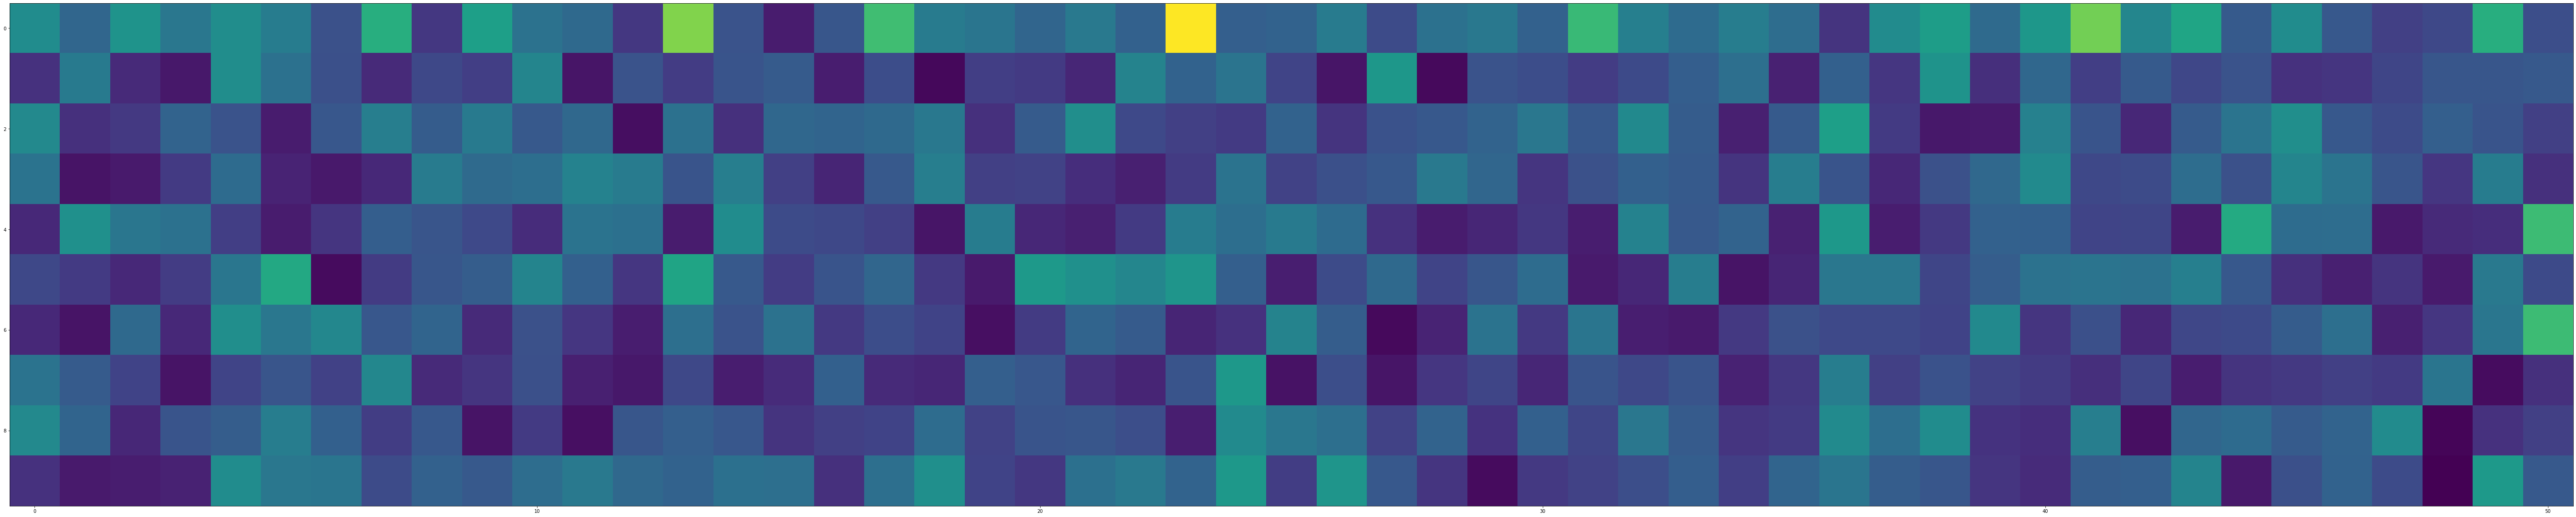

In [181]:
plt.figure(figsize=(100,50))
plt.imshow(np.abs(y))

In [183]:
plt.figure(figsize=(100,50))
plt.plt(np.abs(y[0]),np.abs(y[1]))
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

<Figure size 7200x3600 with 0 Axes>